In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import helper as hp
from statsmodels.regression import linear_model
import scipy.stats as stats

plt.style.use('ggplot')

In [82]:
pathways = {'Denver, CO': ('~/Desktop/capstone/data/Denver_1940_2010.csv', ''),
            'Seattle, WA': ('~/Desktop/capstone/data/Seattle_1898_.csv', 'SEATTLE TACOMA AIRPORT, WA US'),
#            'North Bend, WA': ('~/Desktop/capstone/data/Seattle_1898_.csv', 'CEDAR LAKE, WA US'),
            'Boston, MA': ('~/Desktop/capstone/data/Boston_1936_corr.csv', ''),
#             'JP': ('~/Desktop/capstone/data/JP.csv', ''),
            'Baton Rouge, LA': ('~/Desktop/capstone/data/Baton_Rouge.csv','')}

In [83]:
####  Load all
start_date = datetime(1950,1,1)
end_date = datetime(2019,12,31)
Location = dict()
for name, path in pathways.items():
    Location[name] = hp.GHCN_Loc(*path)
    Location[name].set_range(start_date, end_date)
    Location[name].process()
    Location[name].create_aggregate_df()

In [84]:
#### Get Confidence Intervals
CI_SNOW = dict()

for key, data_obj in Location.items():
        CI_SNOW[key] = data_obj.stats(0, 'SNOW_sum', 0.05, False)


In [85]:
# list(range(1,2*len(CI_SNOW),2))
CI_SNOW

{'Denver, CO': array([-0.55488077, -0.15177657]),
 'Seattle, WA': array([-0.36300757, -0.12211534]),
 'Boston, MA': array([-0.05688745,  0.42020824]),
 'Baton Rouge, LA': array([-0.00812466,  0.00648001])}

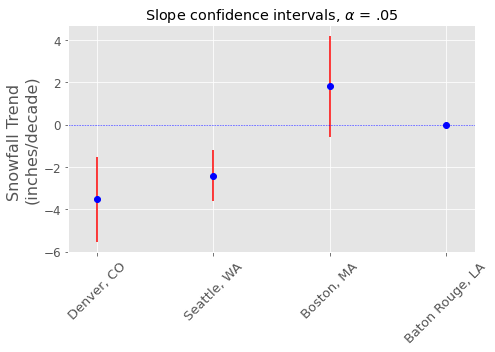

In [124]:
#### Get Confidence Intervals
CI_SNOW = dict()

for key, data_obj in Location.items():
        CI_SNOW[key] = data_obj.stats(0, 'SNOW_sum', 0.05, False)

fig, ax = plt.subplots(1, figsize=(7,5))
X = list(range(1,2*len(CI_SNOW),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_SNOW.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

ax.errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
ax.set_ylabel('''Snowfall Trend 
(inches/decade)''', fontsize = 16)
ax.set_title(r'''Slope confidence intervals, $\alpha$ = .05''')

ax.plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
plt.tight_layout()
plt.savefig('Denver_SNOW_annual_CI.png', edgecolor = 'b')

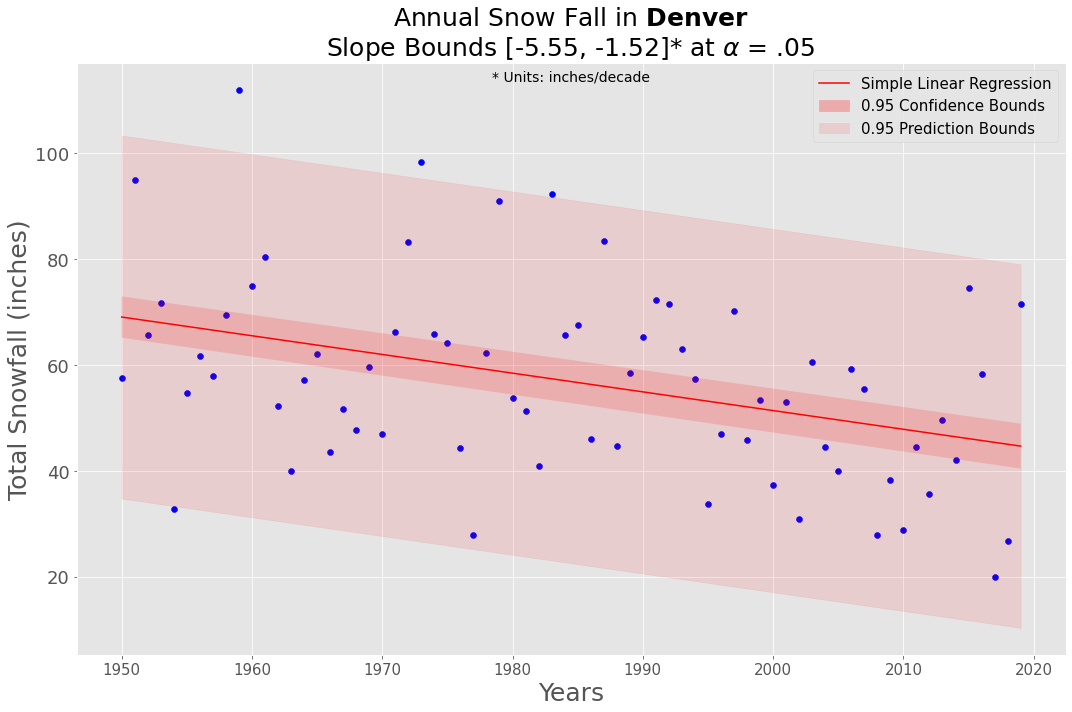

In [106]:
fig, ax = plt.subplots(1, figsize=(15,10))

Loc = Location['Denver, CO']
CI = Loc.stats(ax, 'SNOW_sum', 0.05)

ax.legend(fontsize=15)
leg = ax.get_legend()
leg.legendHandles[1].set_color([1, 0, 0, 0.25])


plt.xticks(fontsize = 15);
plt.yticks(fontsize = 18);
ax.set_ylabel(hp.ylabel_dict['SNOW_sum'], fontsize = 25)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
ax.set_title(r"""Annual Snow Fall in ${\bfDenver}$
"""             + title_text, fontsize = 25)
ax.text(0.42, 0.97, '* Units: inches/decade', transform=ax.transAxes, fontsize=14)

plt.tight_layout()
plt.savefig('Denver_SNOW_annual.png', edgecolor = 'b')

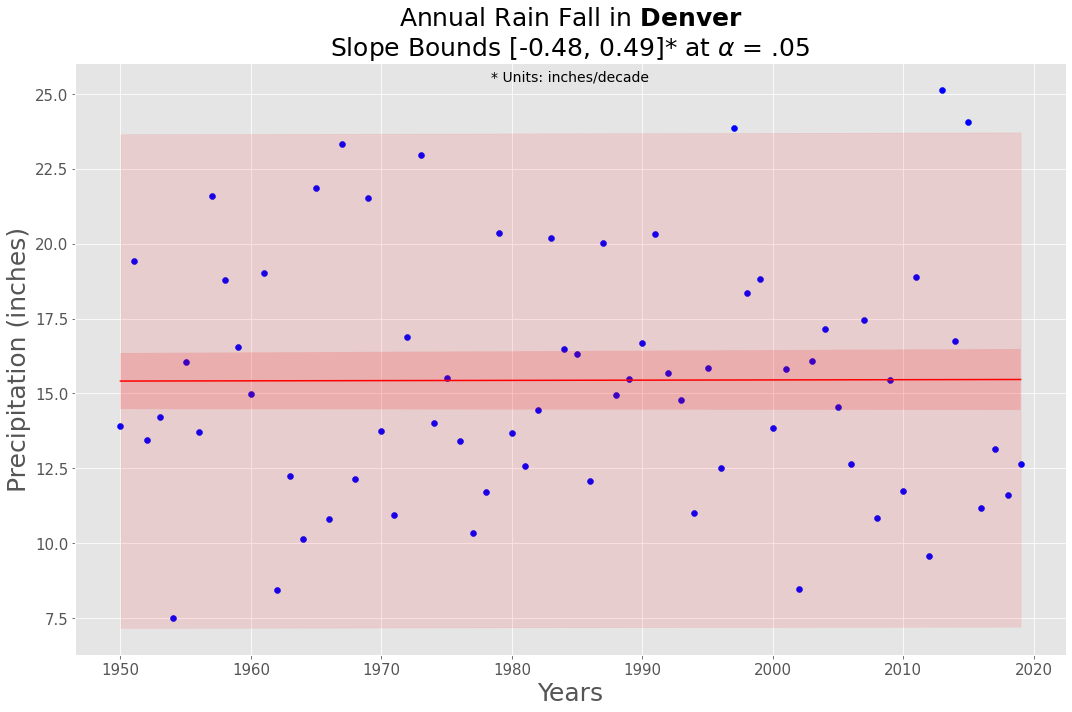

In [125]:
fig, ax = plt.subplots(1, figsize=(15,10))

Loc = Location['Denver, CO']
CI = Loc.stats(ax, 'PRCP_sum', 0.05)

# ax.legend(fontsize=15)
# leg = ax.get_legend()
# leg.legendHandles[1].set_color([1, 0, 0, 0.25])

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 18);
ax.set_ylabel(hp.ylabel_dict['PRCP_sum'], fontsize = 25)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
ax.set_title(r"""Annual Rain Fall in ${\bfDenver}$
"""             + title_text, fontsize = 25)
ax.text(0.42, 0.97, '* Units: inches/decade', transform=ax.transAxes, fontsize=14)

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.tight_layout()
plt.savefig('Denver_PRCP_annual.png', edgecolor = 'b')

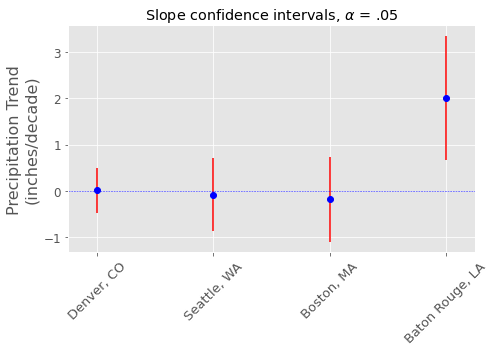

In [120]:
#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'PRCP_sum'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False)

fig, ax = plt.subplots(1, figsize=(7,5))
X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

ax.errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
ax.set_ylabel('''Precipitation Trend
(inches/decade)''', fontsize = 16)
ax.set_title(r'''Slope confidence intervals, $\alpha$ = .05''')

ax.plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
plt.tight_layout()
plt.savefig('Denver_PRCP_annual_CI.png', edgecolor = 'b')

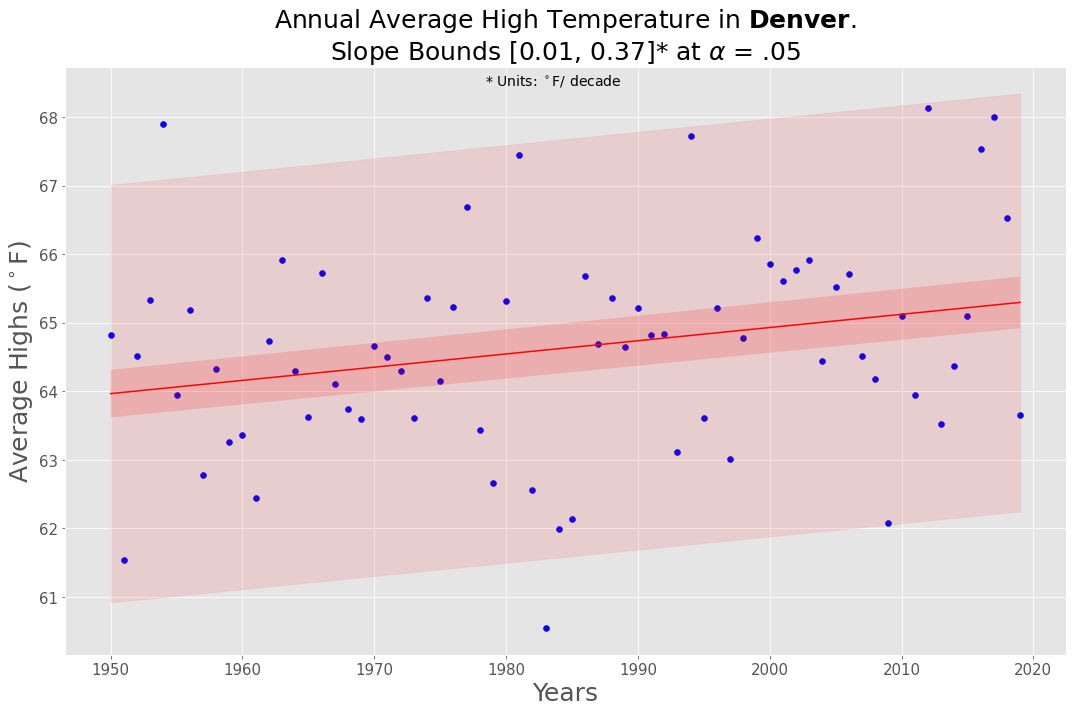

In [126]:
fig, ax = plt.subplots(1, figsize=(15,10))

Loc = Location['Denver, CO']
CI = Loc.stats(ax, 'TMAX_avg', 0.05)

# ax.legend(fontsize=15)
# leg = ax.get_legend()
# leg.legendHandles[1].set_color([1, 0, 0, 0.25])

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 18);
ax.set_ylabel(hp.ylabel_dict['TMAX_avg'], fontsize = 25)
title_text = r"Slope Bounds [{:.2f}, {:.2f}]* at $\alpha$ = .05".format(CI[0]*10, CI[1]*10)
ax.set_title(r"""Annual Average High Temperature in ${\bfDenver}$.
"""             + title_text, fontsize = 25)
ax.text(0.42, 0.97, r'* Units: $^\circ$F/ decade', transform=ax.transAxes, fontsize=14)

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.tight_layout()
plt.savefig('Denver_TMAX_annual.png', edgecolor = 'b')

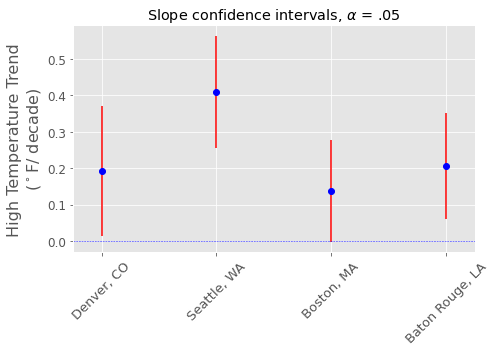

In [122]:
#### Get Confidence Intervals
CI_dict = dict()
agg_name = 'TMAX_avg'

for key, data_obj in Location.items():
        CI_dict[key] = data_obj.stats(0, agg_name, 0.05, False)

fig, ax = plt.subplots(1, figsize=(7,5))
X = list(range(1,2*len(CI_dict),2))
X_labels = []
Y_mean = []
Y_error = []
for name, CI in CI_dict.items():
    X_labels.append(name)
    Y_mean.append(CI.mean()*10)
    Y_error.append((CI.mean()-CI[0])*10)

ax.errorbar(X, Y_mean, yerr=Y_error, fmt = 'o', color = 'b', ecolor='r')
plt.xticks(X, X_labels)
ax.set_ylabel(r'''High Temperature Trend
($^\circ$F/ decade)''', fontsize = 16)
ax.set_title(r'''Slope confidence intervals, $\alpha$ = .05''')

ax.plot([0,10], [0,0], 'b--', linewidth=0.5)
plt.xticks(fontsize = 13, rotation=45);
plt.yticks(fontsize = 12);
plt.xlim([0.5,max(X)+0.5]);
plt.tight_layout()
plt.savefig('Denver_TMAX_annual_CI.png', edgecolor = 'b')

In [10]:
s = pd.Series(["elk", "pig", "dog", "quetzal"], name="animal")
print(s.to_markdown())
# print(s.to_markdown(tablefmt="grid"))

|    | animal   |
|---:|:---------|
|  0 | elk      |
|  1 | pig      |
|  2 | dog      |
|  3 | quetzal  |
